<a href="https://colab.research.google.com/github/nazaIlham/uas.viskom/blob/main/Salinan_dari_Texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [ ]:
#impor library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

membuat fungsi memasukan data gambar

In [ ]:
#membuat fungsi load_image
def load_image(arr):
    strr = "1.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

fungsi mengubah dataset ke grayscale


In [ ]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

extraksi ke vektor


In [ ]:
#membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

mengembalikan array dan ekstraksi ke vektor.

In [ ]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

memuat data set dan menyimpan ke array





In [ ]:
data=[]
data=load_image(data)

mengubah ke gambar grayscale

In [ ]:
dataPreprocessed = preprocessing(data)

ektraksi gambar

In [ ]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

menampilkan hasil ekstraksi

Extraction Result


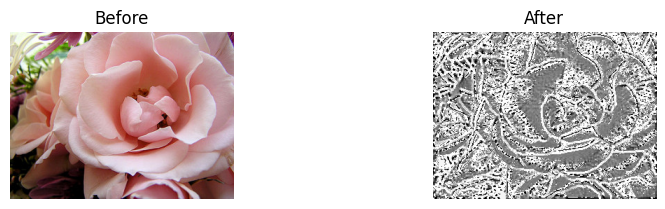

In [ ]:
#menampilkan hasi ekstraksi tekstur
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)
